<a href="https://colab.research.google.com/github/Stocal723/Astronomy-project1/blob/main/DarkEnergy/Supernovae_cosmology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [4]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

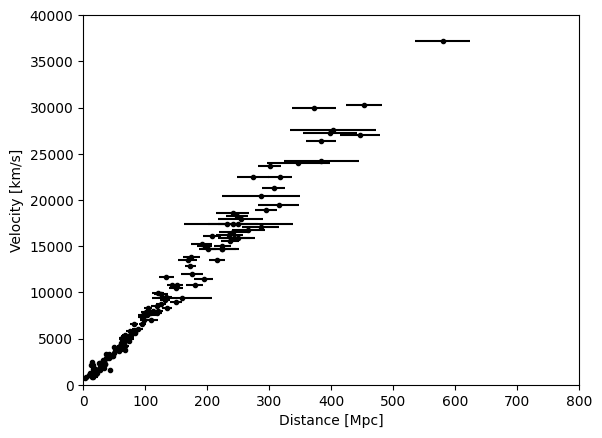

In [17]:
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")# Make an error bar
plt.xlim(0, 800)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [14]:
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 800))# Make a range of data
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1)

In [10]:
p = np.poly1d(z)

In [15]:
velocity_model = p(distance.to(u.mpc).value)

Text(50, 30000, '$H_0$ = 67.73 km/s/Mpc')

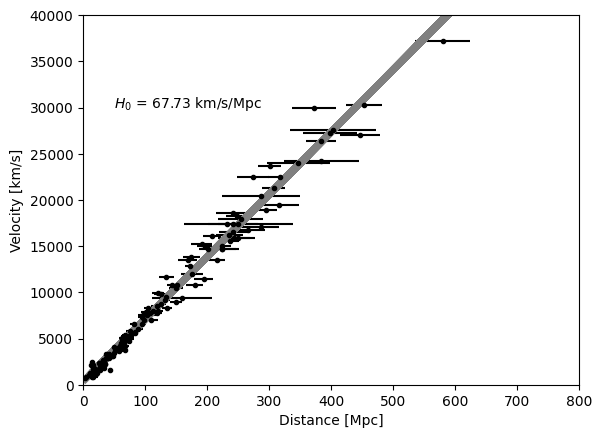

In [29]:
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, velocity_model, color="grey", linewidth=5) #Make a line modle with linewidth=5
plt.xlim(0, 800) # cotrol the range of data
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.annotate(r"$H_0$ = {0:5.2f} km/s/Mpc".format(z[0]), xy=(50, 30000))

In [30]:
# prompt: According to the equation t=1/H, The age of the universe is equal to the reciprocal of Hubble's constant
# H = 67.73 km/s/Mpc

H = 67.73 * u.km / u.s / u.Mpc  # Hubble's constant
t = 1 / H  # Age of the universe

print(f"The age of the universe is approximately: {t.to(u.Gyr):.2f}")

The age of the universe is approximately: 14.44 Gyr
